2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and 
select the best model using R or Python.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
data=pd.read_csv('Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
data.shape

(30, 2)

In [6]:
#checking for null values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
# check for any dupplicated values
data[data.duplicated()].sum()

YearsExperience    0.0
Salary             0.0
dtype: float64

In [8]:
#copy the data into another variable, this doesnot affect the orginal dataset
data1=data.copy()

# Future Engineering 

In [9]:
data1.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
#Rename the column
data1=data.rename({'YearsExperience':'Years_of_Experience','Salary':'Salary_hike'},axis=1)

In [11]:
data1.head(2)

,Years_of_Experience,Salary_hike
0,1.1,39343.0
1,1.3,46205.0


<AxesSubplot:xlabel='Salary_hike', ylabel='Salary_hike'>

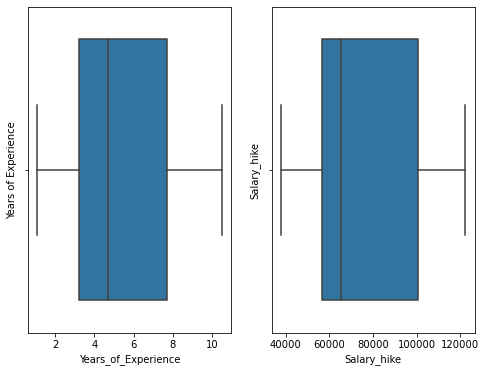

In [12]:
#Detection for outliers
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.boxplot(data1['Years_of_Experience'])
plt.ylabel('Years of Experience')
plt.subplot(1,2,2)
plt.ylabel('Salary_hike')
sns.boxplot(data1['Salary_hike'])


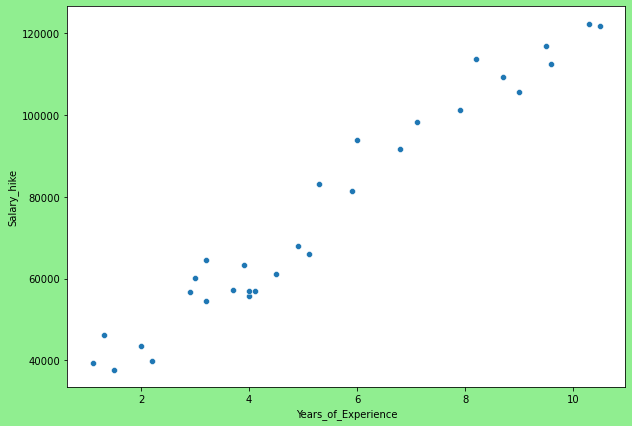

In [39]:
plt.figure(figsize=(10,7),facecolor='lightgreen')
sns.scatterplot(x='Years_of_Experience',y='Salary_hike',data=data1);

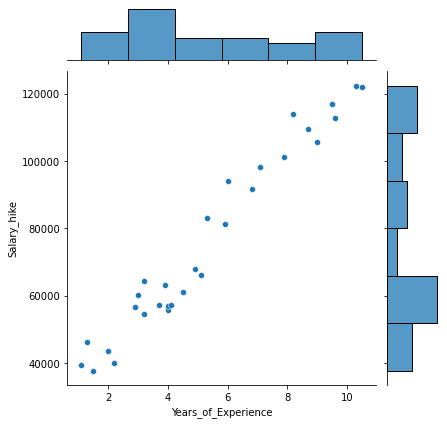

In [16]:
sns.jointplot(x='Years_of_Experience',y='Salary_hike',data=data1)

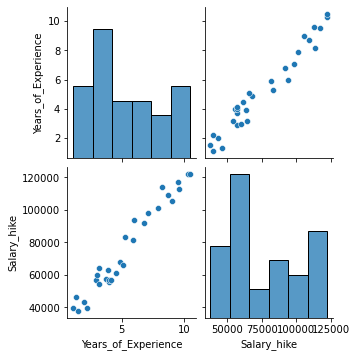

In [17]:
sns.pairplot(data1)

<AxesSubplot:>

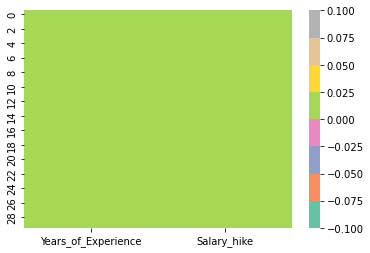

In [18]:
#  Heat Map
#  No null values so heat map shows single color ('No null values') 
cols=data1.columns
sns.heatmap(data1[cols].isna(),cmap=sns.color_palette('Set2'))

In [19]:
#correlation of data
#correlation value 0.978 it means very strong correlation of the linear association is high.
data1.corr()

,Years_of_Experience,Salary_hike
Years_of_Experience,1.000000,0.978242
Salary_hike,0.978242,1.000000


In [20]:
# NOrmalization
from sklearn.preprocessing import MinMaxScaler
data1.values
array=data1.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaled=scaler.fit_transform(array)
np.set_printoptions(precision=2)
print(rescaled[0:10,:])


[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]
 [0.19 0.22]
 [0.2  0.26]
 [0.22 0.2 ]
 [0.22 0.32]
 [0.28 0.23]]


# Model Building

In [21]:
#simple linear regression
import statsmodels.formula.api as smf
data1.head(2)

,Years_of_Experience,Salary_hike
0,1.1,39343.0
1,1.3,46205.0


Salary_hike=Dependent variable;  
Years of Experience= Independent variable.

In [22]:
first_model=smf.ols('Salary_hike~Years_of_Experience',data=data1).fit()

In [27]:
first_model.rsquared

0.9569566641435086

In [28]:
first_model.params

Intercept              25792.200199
Years_of_Experience     9449.962321
dtype: float64

In [29]:
#Model validation
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_hike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        14:03:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Years_of_Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
second_model=smf.ols('np.log(Salary_hike)~Years_of_Experience',data=data1).fit()

In [33]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(Salary_hike)   R-squared:                       0.932
Model:                             OLS   Adj. R-squared:                  0.930
Method:                  Least Squares   F-statistic:                     383.6
Date:                 Wed, 19 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                         14:05:14   Log-Likelihood:                 28.183
No. Observations:                   30   AIC:                            -52.37
Df Residuals:                       28   BIC:                            -49.56
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.5074      0.038    273.327      0.000      10.429      10.586
Years_of_Experience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
Third_model=smf.ols('(Salary_hike)~np.log(Years_of_Experience)',data=data1).fit()

In [36]:
Third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_hike   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        14:06:25   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Years_of_Experience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
first_model.tvalues,first_model.pvalues

(Intercept              273.327166
 Years_of_Experience     19.584833
 dtype: float64,
 Intercept              1.604634e-49
 Years_of_Experience    7.027439e-18
 dtype: float64)

In [37]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(Salary_hike)   R-squared:                       0.932
Model:                             OLS   Adj. R-squared:                  0.930
Method:                  Least Squares   F-statistic:                     383.6
Date:                 Wed, 19 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                         14:06:51   Log-Likelihood:                 28.183
No. Observations:                   30   AIC:                            -52.37
Df Residuals:                       28   BIC:                            -49.56
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.5074      0.038    273.327      0.000      10.429      10.586
Years_of_Experience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

comparing with the other two models first model=0.932 has high R-squared value (near to 1)
#so it is the best Model 